Reproduce Fig2 

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [22]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'

### Get the data

In [8]:
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfdl\\acf\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')
pfp_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfp\\acf\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')

pfdl_acf_average_trial_sttc_df_ = pd.read_pickle(results_folder + 'non_binned\\pfdl\\acf\\' + 'acf_average_trial_sttc_50ms_20lags_df.pkl')
pfp_acf_average_trial_sttc_df_ = pd.read_pickle(results_folder + 'non_binned\\pfp\\acf\\' + 'acf_average_trial_sttc_50ms_20lags_df.pkl')

pfdl_constrained_data_acf_binned_1000_df = pd.read_pickle(results_folder + 'pfdl_constrained_data_acf_binned_1000_df.pkl')
pfp_constrained_data_acf_binned_1000_df = pd.read_pickle(results_folder + 'pfp_constrained_data_acf_binned_1000_df.pkl')

pfdl_included_units_l = pfdl_constrained_data_acf_binned_1000_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1')['unit_id'].values
pfdl_acf_average_trial_sttc_df = pfdl_acf_average_trial_sttc_df_[pfdl_acf_average_trial_sttc_df_['unit_id'].isin(pfdl_included_units_l)].copy()
pfdl_acf_average_trial_sttc_df.reset_index(inplace=True, drop=True)

pfp_included_units_l = pfp_constrained_data_acf_binned_1000_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1')['unit_id'].values
pfp_acf_average_trial_sttc_df = pfp_acf_average_trial_sttc_df_[pfp_acf_average_trial_sttc_df_['unit_id'].isin(pfp_included_units_l)].copy()
pfp_acf_average_trial_sttc_df.reset_index(inplace=True, drop=True)

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_pearsonr_df), len(pfp_acf_average_trial_pearsonr_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_sttc_df), len(pfp_acf_average_trial_sttc_df)))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_df.isnull().any().any()))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_df.isnull().any().any()))

N neurons in PFdl 367 
N neurons in PFp 318
N neurons in PFdl 367 
N neurons in PFp 318
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False


In [9]:
pfdl_acf_average_trial_pearsonr_df.head(2)

,unit_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,acf_6,acf_7,acf_8,...,acf_10,acf_11,acf_12,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19
0,0,1.0,0.443787,0.429808,0.374760,0.333984,0.287734,0.240484,0.189922,0.194006,...,0.192847,0.148964,0.216269,0.151006,0.159405,0.112679,0.020760,0.038556,0.046108,-0.052432
1,3,1.0,0.436855,0.391458,0.371095,0.311763,0.294205,0.312247,0.282377,0.260343,...,0.266865,0.243661,0.274786,0.217886,0.234229,0.208189,0.152333,0.194667,0.227410,0.222422


In [10]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

pfdl_acf_2d = pfdl_acf_average_trial_pearsonr_df[acf_cols].values
pfp_acf_2d = pfp_acf_average_trial_pearsonr_df[acf_cols].values

pfdl_acf_mean = np.nanmean(pfdl_acf_2d, axis=0)
pfdl_acf_sem = stats.sem(pfdl_acf_2d, axis=0)
pfp_acf_mean = np.nanmean(pfp_acf_2d, axis=0)
pfp_acf_sem = stats.sem(pfp_acf_2d, axis=0)

pfdl_acf_sttc_2d = pfdl_acf_average_trial_sttc_df[acf_cols].values
pfp_acf_sttc_2d = pfp_acf_average_trial_sttc_df[acf_cols].values

pfdl_acf_sttc_mean = np.nanmean(pfdl_acf_sttc_2d, axis=0)
pfdl_acf_sttc_sem = stats.sem(pfdl_acf_sttc_2d, axis=0)
pfp_acf_sttc_mean = np.nanmean(pfp_acf_sttc_2d, axis=0)
pfp_acf_sttc_sem = stats.sem(pfp_acf_sttc_2d, axis=0)

### Calculate tau

In [11]:
def func_single_exp(x, a, b, c):
    """
    Exponential function to fit the data.
    :param x: 1d array, independent variable
    :param a: float, parameter to fit
    :param b: float, parameter to fit
    :param c: float, parameter to fit
    :return: callable
    """
    #return a * np.exp(-b * x) + c
    return a * (np.exp(-b * x) + c) # as in the paper

In [12]:
def calc_tau_area_mean(acf_mean_, start_idx_=1):    
    t = np.linspace(0, len(acf_mean_)-1, len(acf_mean_)).astype(int)
    # print(t)
    
    popt, pcov = curve_fit(func_single_exp, t[start_idx_:], acf_mean_[start_idx_:], maxfev=1000000000) # I used 5000, now it is like in Siegle
    tau = 1 / popt[1]
    
    # fit r-squared
    y_pred = func_single_exp(t[start_idx_:], *popt)
    fit_r_squared = r2_score(acf_mean_[start_idx_:], y_pred)

    return tau, popt, fit_r_squared

In [13]:
pfdl_tau, pfdl_popt, pfdl_fit_r_squared = calc_tau_area_mean(pfdl_acf_mean, start_idx_=2)
pfdl_tau_ms = pfdl_tau*50
print('pfdl_tau {}, pfdl_popt {}, pfdl_fit_r_squared {}'.format(pfdl_tau_ms, pfdl_popt, pfdl_fit_r_squared))

pfp_tau, pfp_popt, pfp_fit_r_squared = calc_tau_area_mean(pfp_acf_mean, start_idx_=2)
pfp_tau_ms = pfp_tau*50
print('pfp_tau {}, pfp_popt {}, pfp_fit_r_squared {}'.format(pfp_tau_ms, pfp_popt, pfp_fit_r_squared))

pfdl_tau 235.90304847805464, pfdl_popt [0.24190483 0.21195148 0.08946648], pfdl_fit_r_squared 0.9975039860068926
pfp_tau 229.3335430571914, pfp_popt [0.19424553 0.21802306 0.10490578], pfp_fit_r_squared 0.9950033078805028


In [14]:
pfdl_sttc_tau, pfdl_sttc_popt, pfdl_sttc_fit_r_squared = calc_tau_area_mean(pfdl_acf_sttc_mean, start_idx_=2)
pfdl_sttc_tau_ms = pfdl_sttc_tau*50
print('pfdl_sttc_tau {}, pfdl_sttc_popt {}, pfdl_sttc_fit_r_squared {}'.format(pfdl_sttc_tau_ms, pfdl_sttc_popt, pfdl_sttc_fit_r_squared))

pfp_sttc_tau, pfp_sttc_popt, pfp_sttc_fit_r_squared = calc_tau_area_mean(pfp_acf_sttc_mean, start_idx_=2)
pfp_sttc_tau_ms = pfp_sttc_tau*50
print('pfp_sttc_tau {}, pfp_sttc_popt {}, pfp_sttc_fit_r_squared {}'.format(pfp_sttc_tau_ms, pfp_sttc_popt, pfp_sttc_fit_r_squared))

pfdl_sttc_tau 229.38637284228025, pfdl_sttc_popt [0.16184757 0.21797284 0.84459491], pfdl_sttc_fit_r_squared 0.9947365638750347
pfp_sttc_tau 233.8159547789007, pfp_sttc_popt [0.13123612 0.21384341 0.94258238], pfp_sttc_fit_r_squared 0.9920759083177269


### Plot

In [24]:
save_fig = True

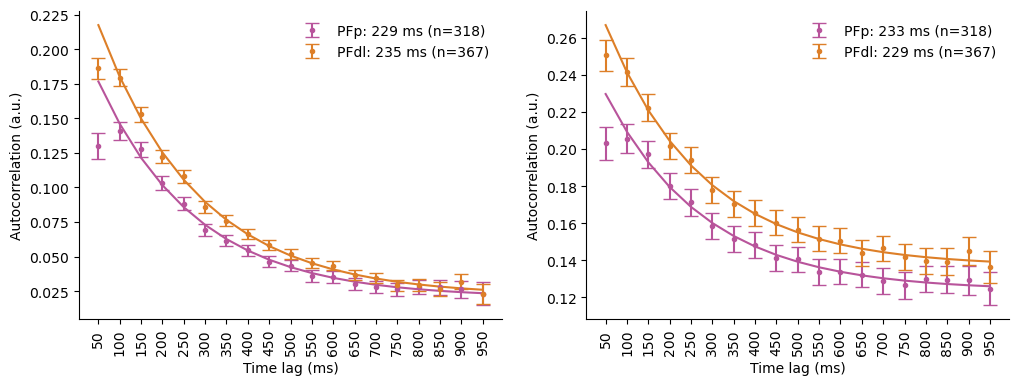

In [26]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

pfp_label = 'PFp: ' + str(int(pfp_tau_ms)) + ' ms (n=' + str(len(pfp_acf_average_trial_pearsonr_df)) + ')'
axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp(t, pfp_popt[0], pfp_popt[1], pfp_popt[2]), color='#b8549b')

pfdl_label = 'PFdl: ' + str(int(pfdl_tau_ms)) + ' ms (n=' + str(len(pfdl_acf_average_trial_pearsonr_df)) + ')'
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp(t, pfdl_popt[0], pfdl_popt[1], pfdl_popt[2]), color='#dd7f28', )


pfp_label = 'PFp: ' + str(int(pfp_sttc_tau_ms)) + ' ms (n=' + str(len(pfp_acf_average_trial_sttc_df)) + ')'
axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp(t, pfp_sttc_popt[0], pfp_sttc_popt[1], pfp_sttc_popt[2]), color='#b8549b')

pfdl_label = 'PFdl: ' + str(int(pfdl_sttc_tau_ms)) + ' ms (n=' + str(len(pfdl_acf_average_trial_sttc_df)) + ')'
axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp(t, pfdl_sttc_popt[0], pfdl_sttc_popt[1], pfdl_sttc_popt[2]), color='#dd7f28', )

#axes.set_ylim([0, 0.25])

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc.svg', bbox_inches='tight')